# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrames

In [4]:
df = pd.read_csv("Data/MovieProject/tmdb_ALL_results_combined.csv.gz")
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0115937,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN


In [5]:
df.shape

(79234, 26)

# Movies with at least some valid financial information
- Values > 0 for budget or revenue
- Exclude any movies with 0's for budget and revenue from visuals

In [7]:
df_vf = df.loc[(df['budget'] > 0) & (df['revenue'] > 0)]
df_vf.shape

(5088, 26)

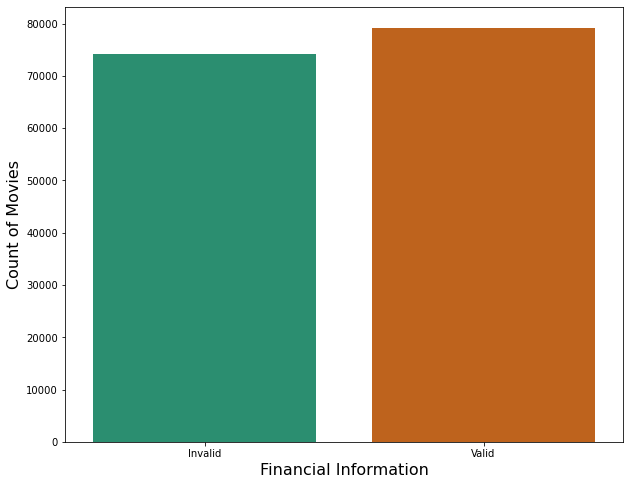

In [71]:
fig, axes = plt.subplots(figsize=(10, 8))
axes = sns.barplot(x = ['Invalid', 'Valid'], y=[df.shape[0]-df_vf.shape[0], df.shape[0]], palette='Dark2')
axes.set_xlabel('Financial Information', fontsize=16)
axes.set_ylabel('Count of Movies', fontsize=16);

# Number of movies in each certification category
- G/PG/PG-13/R

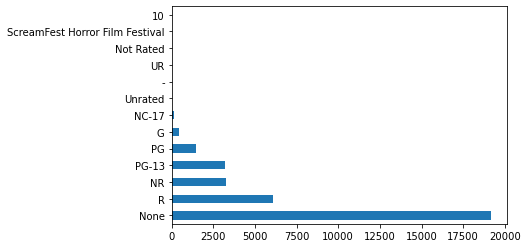

In [61]:
df['certification'].value_counts().plot(kind='barh');

# Average revenue per certification category

In [62]:
average_revenue = df.groupby('certification')['revenue'].mean()
average_revenue

certification
-                                  0.000000e+00
10                                 0.000000e+00
G                                  3.479444e+07
NC-17                              1.169921e+06
NR                                 1.778305e+06
None                               0.000000e+00
Not Rated                          0.000000e+00
PG                                 6.865397e+07
PG-13                              7.305627e+07
R                                  1.631593e+07
ScreamFest Horror Film Festival    0.000000e+00
UR                                 0.000000e+00
Unrated                            0.000000e+00
Name: revenue, dtype: float64

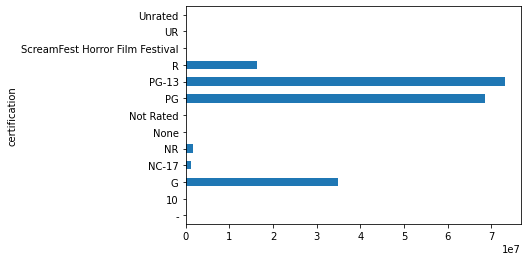

In [64]:
average_revenue.plot(kind='barh');

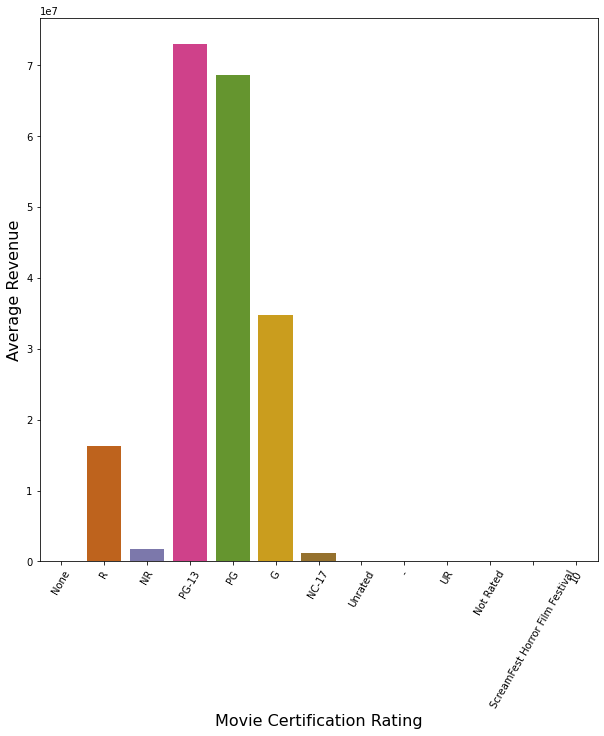

In [77]:
fig, axes = plt.subplots(figsize=(10, 10))
axes = sns.barplot(x = average_revenue.index, y=average_revenue.values,
                   order=df['certification'].value_counts().index, palette='Dark2')
plt.setp(axes.get_xticklabels(), rotation=60)
axes.set_xlabel('Movie Certification Rating', fontsize=16)
axes.set_ylabel('Average Revenue', fontsize=16);

# Average budget per certification category

In [78]:
average_budget = df.groupby('certification')['budget'].mean()
average_budget

certification
-                                  0.000000e+00
10                                 0.000000e+00
G                                  1.155339e+07
NC-17                              6.098759e+05
NR                                 7.998246e+05
None                               0.000000e+00
Not Rated                          0.000000e+00
PG                                 2.281171e+07
PG-13                              2.496482e+07
R                                  7.744554e+06
ScreamFest Horror Film Festival    0.000000e+00
UR                                 0.000000e+00
Unrated                            5.200000e+01
Name: budget, dtype: float64

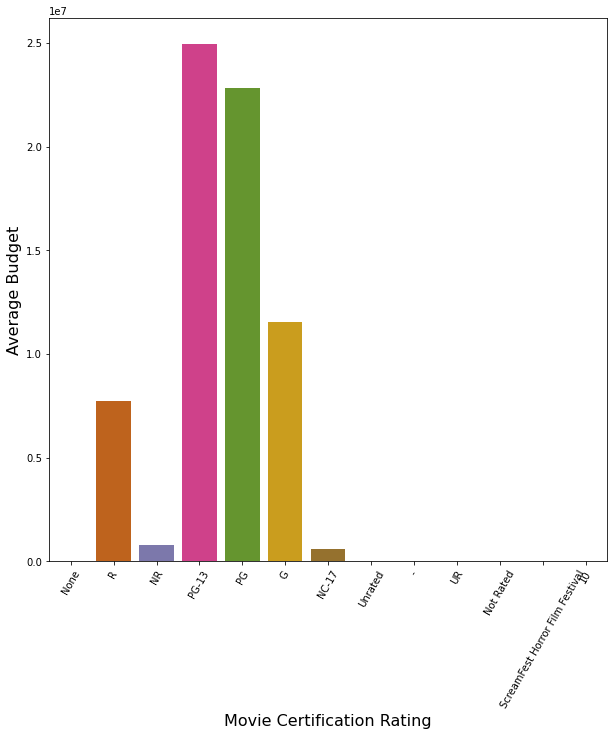

In [79]:
fig, axes = plt.subplots(figsize=(10, 10))
axes = sns.barplot(x = average_budget.index, y=average_budget.values,
                   order=df['certification'].value_counts().index, palette='Dark2')
plt.setp(axes.get_xticklabels(), rotation=60)
axes.set_xlabel('Movie Certification Rating', fontsize=16)
axes.set_ylabel('Average Budget', fontsize=16);